<a href="https://colab.research.google.com/github/pedrosoriaa1a/Ironman_World_Championship/blob/main/Ironman_World_Championship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ironman World Championship**

**Introducción**

El triatlón empieza, según la leyenda popular, por una apuesta entre marines norteamericanos en el año 1978, en la isla de Hawái, para dilucidar qué deporte y por tanto, qué deportista sería el más resistente y completo en su conjunto; un nadador, un atleta o un ciclista, que daría origen al actual Ironman de Hawái.

Entre los triatlones más famosos del mundo se encuentra el IRONMAN, cuyo campeonato mundial se realiza cada año en las vegas.

**Contenido**

El triatlón Ironman es una serie de carreras organizadas por World Triathlon Corporation. Los participantes tienen que cubrir 3 distancias:
* 3,86 km de natación
* 180 km de ciclismo
* 42,2 km de carrera a pie. La carrera tiene un tiempo límite de 17 horas.


El Ironman 70.3. Esta distancia más corta, conocida anteriormente como medio ironman, consiste en 1,9 km de natación, 90 km de ciclismo y 21 km de atletismo. Al igual que la distancia Ironman (completa), la serie 70.3, consiste en un número de competencias calificativas en distintos países, culminando en el campeonato del mundo, con los atletas que más acumularon puntaje en los eventos calificativos. El Campeonato del Mundo se lleva a cabo en Las Vegas

## Librerías a usar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Para ocultar todos los warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# !pip install chardet
import chardet


## Entendiendo los datos

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

# Detect the encoding
with open('/content/drive/MyDrive/data/Ironman_World_Championship.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000)) # Read a portion of the file

print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [5]:
iron_man_data = pd.read_csv('/content/drive/MyDrive/data/Ironman_World_Championship.csv', encoding = 'Windows-1252')

In [6]:
iron_man_data.head()

,Year,Place,Athlete,Country,Time,Gender
0,2019,1,Jan Frodeno,GER,7:51:13,Male
1,2018,1,Patrick Lange,GER,7:52:39,Male
2,2017,1,Patrick Lange,GER,8:01:40,Male
3,2016,1,Jan Frodeno,GER,8:06:30,Male
4,2015,1,Jan Frodeno,GER,8:14:40,Male


## Sanity *Check*

In [7]:

print("El dataset cuenta con {} registros y {} columnas".format(iron_man_data.shape[0],iron_man_data.shape[1]))

El dataset cuenta con 252 registros y 6 columnas


### Información sobre las variables y tipo de dato

In [8]:
iron_man_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     252 non-null    int64 
 1   Place    252 non-null    int64 
 2   Athlete  252 non-null    object
 3   Country  252 non-null    object
 4   Time     252 non-null    object
 5   Gender   252 non-null    object
dtypes: int64(2), object(4)
memory usage: 11.9+ KB


### Valores nulos

In [9]:
iron_man_data.isnull().sum()

Year       0
Place      0
Athlete    0
Country    0
Time       0
Gender     0
dtype: int64

### Valores NA

In [10]:
iron_man_data.isna().sum()

Year       0
Place      0
Athlete    0
Country    0
Time       0
Gender     0
dtype: int64

## Análisis exploratorio de los datos

In [11]:
iron_man_data.describe(include='all')

,Year,Place,Athlete,Country,Time,Gender
count,252.000000,252.000000,252,252,252,252
unique,NaN,NaN,105,16,247,2
top,NaN,NaN,Paula Newby-Fraser,USA,9:36:57,Male
freq,NaN,NaN,10,81,2,129
mean,1998.579365,1.992063,NaN,NaN,NaN,NaN
std,12.024446,0.818083,NaN,NaN,NaN,NaN
min,1978.000000,1.000000,NaN,NaN,NaN,NaN
25%,1988.000000,1.000000,NaN,NaN,NaN,NaN
50%,1998.500000,2.000000,NaN,NaN,NaN,NaN
75%,2009.000000,3.000000,NaN,NaN,NaN,NaN


### Gráficos

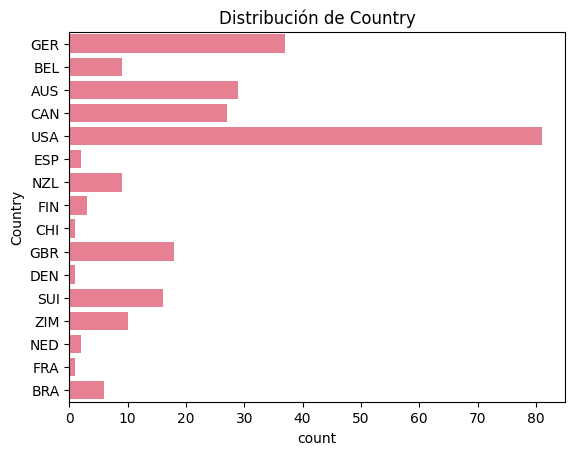

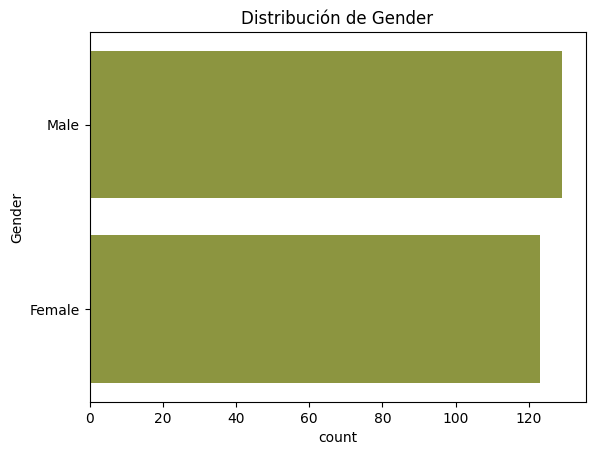

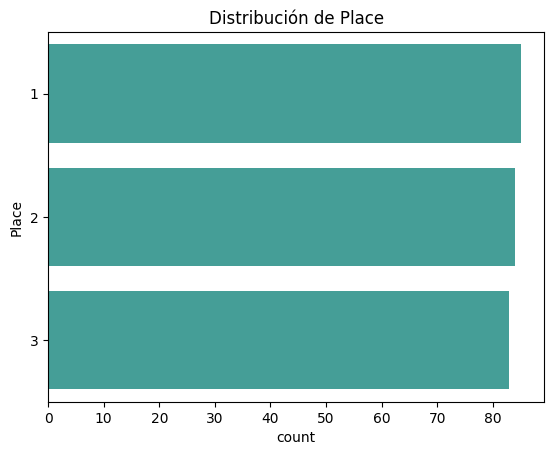

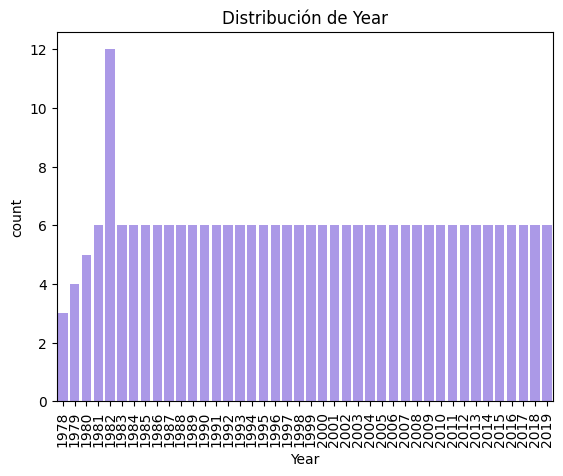

In [12]:
columnas_categoricas = ['Country', 'Gender','Place', 'Year']
colores = sns.color_palette("husl", len(columnas_categoricas))

for i, columna in enumerate(columnas_categoricas):
  if columna == 'Year':
    sns.countplot(x=iron_man_data[columna], color=colores[i])
    plt.xticks(rotation=90)
  else:
    sns.countplot(y=iron_man_data[columna], color=colores[i])
  plt.title(f'Distribución de {columna}')
  plt.show()

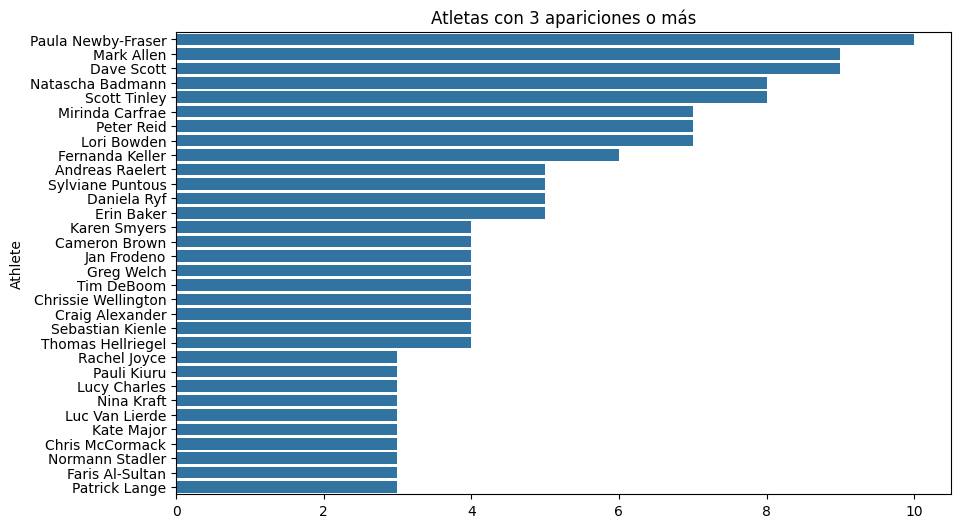

In [13]:
plt.figure(figsize=(10, 6))
athlete_counts = iron_man_data['Athlete'].value_counts()
athlete_counts_filtered = athlete_counts[athlete_counts >= 3]
sns.barplot(y=athlete_counts_filtered.index, x=athlete_counts_filtered.values)
plt.title('Atletas con 3 apariciones o más')
plt.show()

#### Insights

* Estados Unidos y Alemania lideran el número de apariciones en los primeros tres puestos de la competencia desde el año 1978
* La atleta Paula Newby es la competidora con más apariciones, em los primeros 3 puestos con un total de 10 apariciones
* Hay una distribución similar entre la cantidad competidores varones y mujeres que han estado en los 3 primeros puestos desde 1978

### Hipótesis

#### ¿Los tiempos de finalización han disminuido a lo largo de los años?

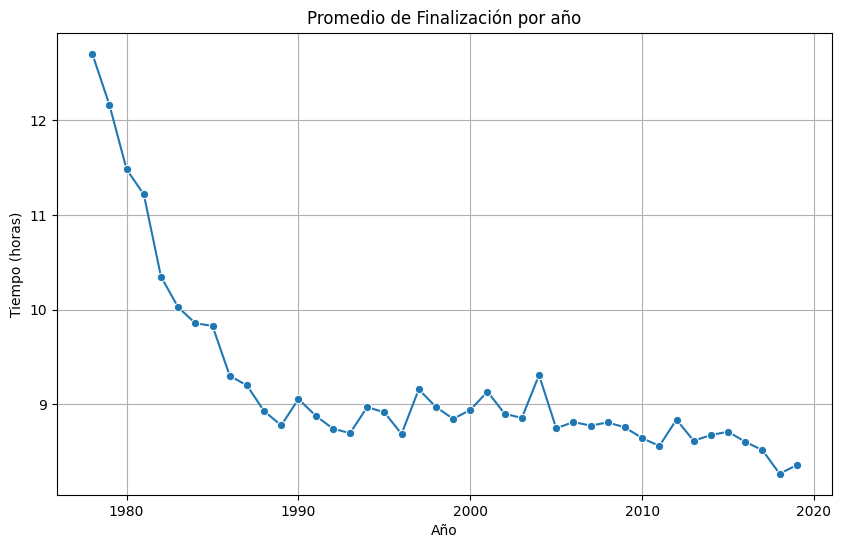

Slope: -0.05861156203201015, Intercept: 126.36151029240087, R-squared: 0.5316218557021956, p-value: 4.3514199971562324e-08


In [14]:
# Convertimos la variable Time a formato de tiempo
iron_man_data['Time'] = pd.to_timedelta(iron_man_data['Time'])

# Conversión tiempo en horas
iron_man_data['Time_in_hours'] = iron_man_data['Time'].dt.total_seconds() / 3600

# Agrupamos por año y se calcula el tiempo promedio
yearly_avg_time = iron_man_data.groupby('Year')['Time_in_hours'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Time_in_hours', data=yearly_avg_time, marker='o')
plt.title('Promedio de Finalización por año')
plt.xlabel('Año')
plt.ylabel('Tiempo (horas)')
plt.grid(True)
plt.show()

# Regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(yearly_avg_time['Year'], yearly_avg_time['Time_in_hours'])
print(f'Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}, p-value: {p_value}')


Hay una tendencia significativa de disminución en los tiempos de finalización de los atletas en el Ironman World Championship a lo largo de los años. Los atletas están completando la competición en tiempos cada vez más rápidos, y esta tendencia es estadísticamente significativa.

#### Hay una diferencia significativa en los tiempos de finalización entre hombres y mujeres

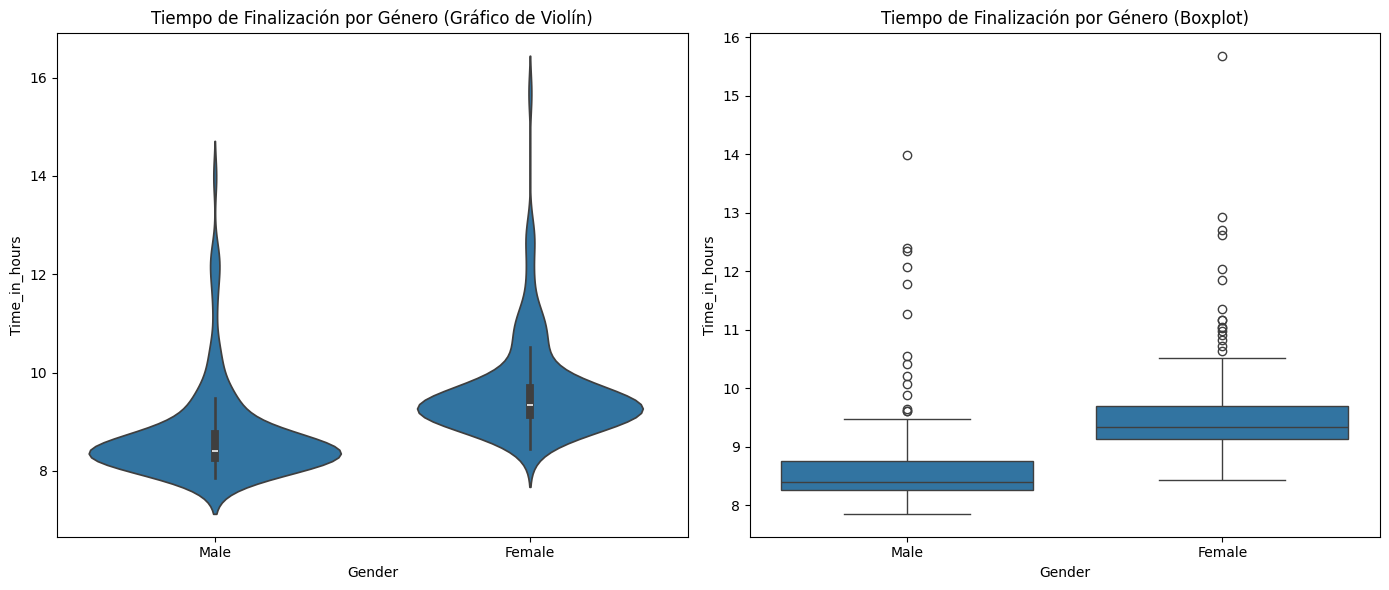

Estadístico t: -7.40
Valor p: 0.000
Hay una diferencia significativa en los tiempos de finalización entre hombres y mujeres (p < 0.05).


In [15]:
# Filtramos los datos por género
male_times = iron_man_data[iron_man_data['Gender'] == 'Male']['Time_in_hours']
female_times = iron_man_data[iron_man_data['Gender'] == 'Female']['Time_in_hours']

# Plots de violín y boxplot para comparar entre géneros
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x='Gender', y='Time_in_hours', data=iron_man_data)
plt.title('Tiempo de Finalización por Género (Gráfico de Violín)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Time_in_hours', data=iron_man_data)
plt.title('Tiempo de Finalización por Género (Boxplot)')

plt.tight_layout()
plt.show()

# Prueba t para comparar los tiempos de finalización entre hombres y mujeres
t_stat, p_value = stats.ttest_ind(male_times, female_times, equal_var=False)

# Resultados prueba t
print(f'Estadístico t: {t_stat:.2f}')
print(f'Valor p: {p_value:.3f}')

# Valor p
alpha = 0.05
if p_value < alpha:
    print(f'Hay una diferencia significativa en los tiempos de finalización entre hombres y mujeres (p < {alpha}).')
else:
    print(f'No hay una diferencia significativa en los tiempos de finalización entre hombres y mujeres (p >= {alpha}).')


Dado que el valor p es menor que 0.05, podemos rechazar la hipótesis nula de que no hay diferencia en los tiempos de finalización entre hombres y mujeres. Esto significa que:

Hay una diferencia significativa en los tiempos de finalización entre hombres y mujeres.
En general, los tiempos de finalización para las mujeres tienden a ser mayores que para los hombres
Implicaciones
Esta diferencia significativa puede tener varias interpretaciones y causas posibles:

* Factores Fisiológicos: Pueden existir diferencias en el rendimiento físico promedio entre hombres y mujeres que afectan los tiempos de finalización.
* Participación: El número y nivel de competencia de mujeres en comparación con hombres puede variar, lo cual también podría influir en los resultados.


#### Los atletas de ciertos países tienen mejores tiempos de finalización

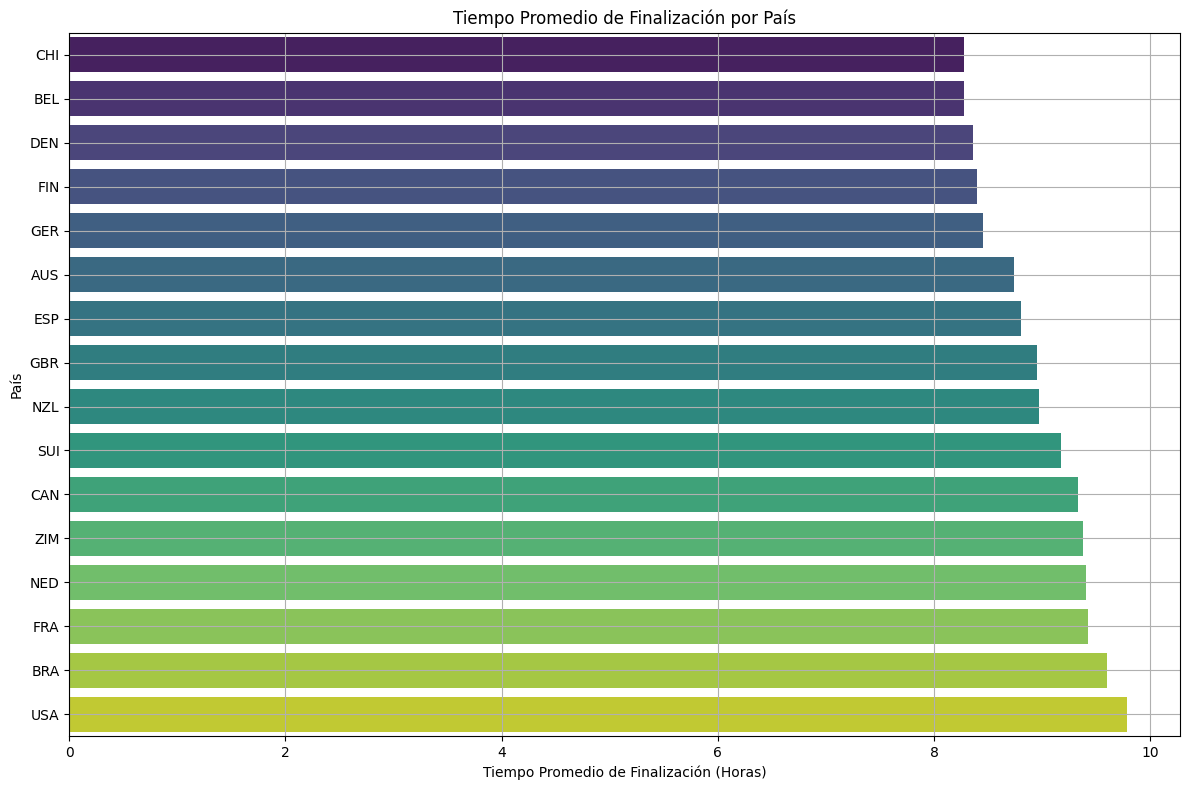

Estadístico F: 4.93
Valor p: 0.000
Hay una diferencia significativa en los tiempos de finalización entre los países (p < 0.05).


In [16]:
# Agrupamos país y calculamos el tiempo promedio de finalización
country_avg_times = iron_man_data.groupby('Country')['Time_in_hours'].mean().reset_index()
country_avg_times = country_avg_times.sort_values(by='Time_in_hours')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Time_in_hours', y='Country', data=country_avg_times, palette='viridis')
plt.xlabel('Tiempo Promedio de Finalización (Horas)')
plt.ylabel('País')
plt.title('Tiempo Promedio de Finalización por País')
plt.grid(True)
plt.tight_layout()
plt.show()

# ANOVA para determinar diferencias significativas
# Dtaos
countries = iron_man_data['Country'].unique()
time_data_by_country = [iron_man_data[iron_man_data['Country'] == country]['Time_in_hours'] for country in countries]

# Prueba ANOVA
f_stat, p_value = stats.f_oneway(*time_data_by_country)

# Resultados
print(f'Estadístico F: {f_stat:.2f}')
print(f'Valor p: {p_value:.3f}')

# Valor p
alpha = 0.05
if p_value < alpha:
    print(f'Hay una diferencia significativa en los tiempos de finalización entre los países (p < {alpha}).')
else:
    print(f'No hay una diferencia significativa en los tiempos de finalización entre los países (p >= {alpha}).')

Dado que el valor p es menor que 0.05, podemos rechazar la hipótesis nula de que no hay diferencia en los tiempos de finalización entre los países. Esto significa que:

Hay una diferencia significativa en los tiempos de finalización entre los países.
Los tiempos de finalización de los atletas varían significativamente dependiendo del país de origen.
Implicaciones
* Factores Regionales: Diferencias en el entrenamiento, recursos, o condiciones específicas del país que afectan el rendimiento de los atletas.
* Nivel de Competencia: La presencia de atletas de élite o el nivel de competencia en cada país puede influir en los tiempos de finalización.


### Matriz de correlación

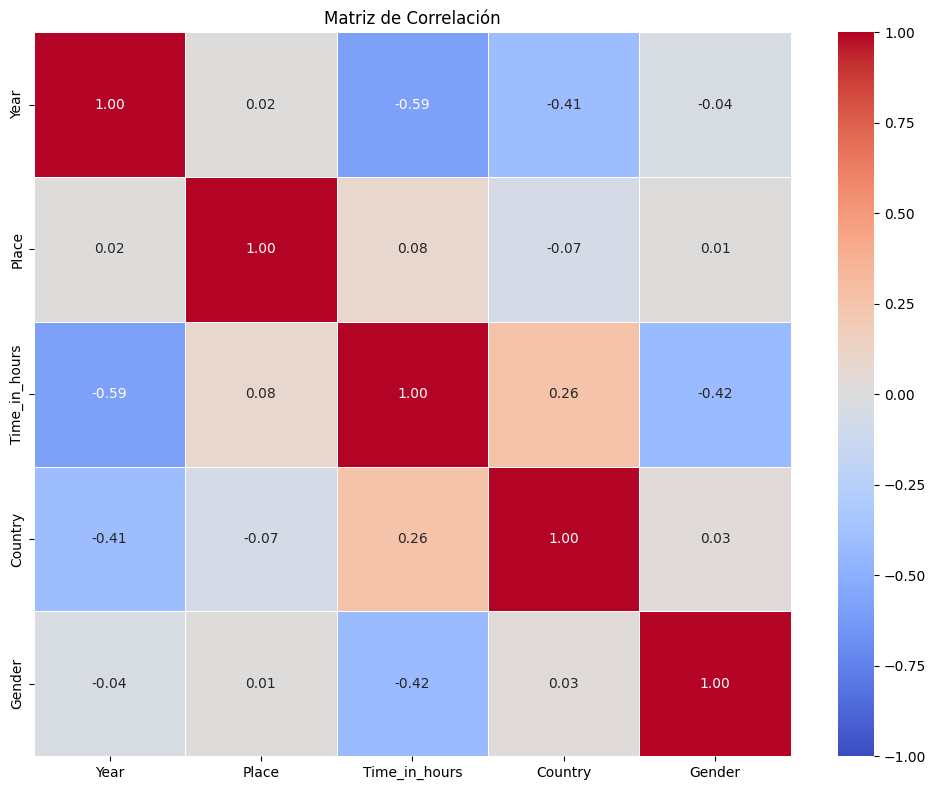

In [17]:
iron_man_data_2 = iron_man_data.copy()

# Variables categoricas a numéricas
iron_man_data_2['Country'] = iron_man_data['Country'].astype('category').cat.codes
iron_man_data_2['Gender'] = iron_man_data['Gender'].astype('category').cat.codes

correlation_data = iron_man_data_2[['Year', 'Place', 'Time_in_hours', 'Country', 'Gender']]

corr_matrix = correlation_data.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()


Las correlaciones positivas más fuertes son:


*   El país vs el tiempo: Existen países que están asociados con tiempos de finalización más largos.


Las correlaciones negativas más fuertes son:


*   Género vs tiempo: El tiempo tiende a ser un poco mayor si el género se trata de mujeres
*   Tiempo vs año: Cada año los atletas muestran mejor rendimiento cara la competencia, terminando el recorrido en menor tiempo





### KPI's

Después del análisis anterior se definen los siguientes kpi's:



1.   Tiempo Promedio de Finalización por País:

      El tiempo promedio de finalización de los atletas agrupados por país. Este KPI permite identificar qué países tienen mejores (más rápidos) tiempos de finalización en promedio.

      Justificación: Basado en la correlación entre el tiempo en horas y el país, este KPI ayudará a evaluar el rendimiento promedio de los atletas de diferentes países.


2.   Tiempo Promedio de Finalización por Género:

      El tiempo promedio de finalización de los atletas agrupados por género. Este KPI permite comparar los tiempos de finalización entre hombres y mujeres.

      Justificación: Basado en la hipótesis y análisis de correlación entre el tiempo en horas y el género, este KPI ayudará a entender las diferencias de rendimiento entre géneros.

3.  Distribución del Tiempo de Finalización por Lugar

      El tiempo promedio de finalización agrupado por el lugar en el que los atletas terminaron la competencia. Este KPI proporciona información sobre cómo varían los tiempos de finalización según la posición final de los atletas.
      
      Justificación: Analizar cómo el tiempo de finalización se distribuye en función del lugar puede revelar patrones importantes sobre la competitividad y las diferencias en el rendimiento entre los atletas que terminan en diferentes posiciones. Puede mostrar, por ejemplo, si los atletas que terminan en los primeros lugares tienen una mayor consistencia en sus tiempos en comparación con los que terminan en posiciones más bajas.

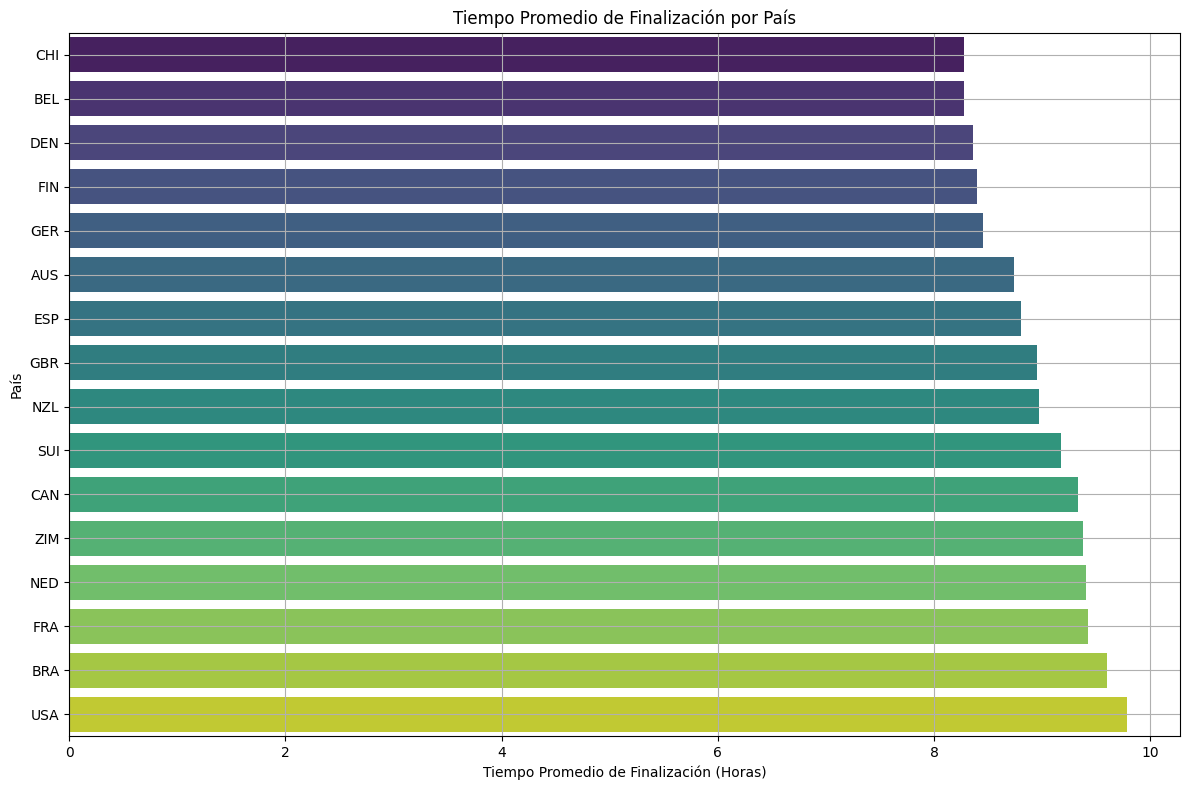

In [18]:
# KPI 1: Tiempo Promedio de Finalización por País
country_avg_times = iron_man_data.groupby('Country')['Time_in_hours'].mean().reset_index()
country_avg_times = country_avg_times.sort_values(by='Time_in_hours')

plt.figure(figsize=(12, 8))
sns.barplot(x='Time_in_hours', y='Country', data=country_avg_times, palette='viridis')
plt.xlabel('Tiempo Promedio de Finalización (Horas)')
plt.ylabel('País')
plt.title('Tiempo Promedio de Finalización por País')
plt.grid(True)
plt.tight_layout()
plt.show()

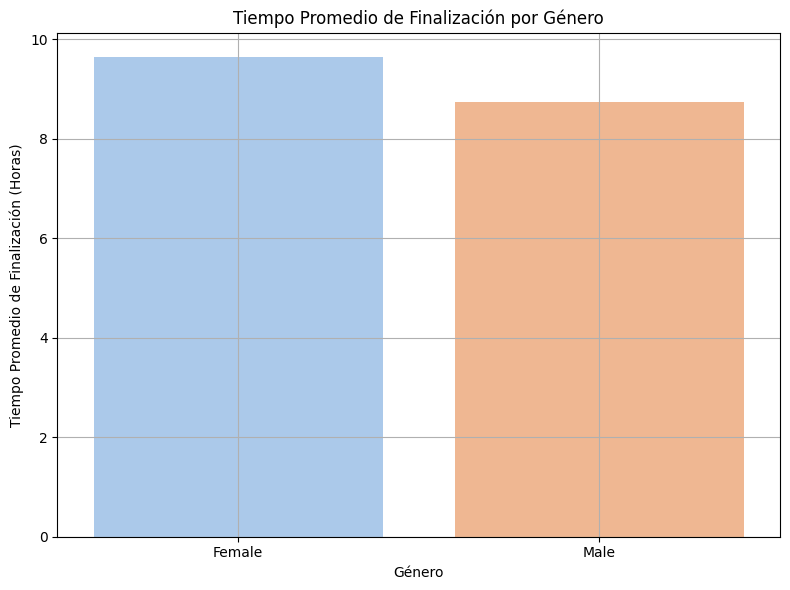

In [19]:

# KPI 2: Tiempo Promedio de Finalización por Género
gender_avg_times = iron_man_data.groupby('Gender')['Time_in_hours'].mean().reset_index()

gender_avg_times['Gender'] = iron_man_data['Gender'].astype('category').cat.categories

plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Time_in_hours', data=gender_avg_times, palette='pastel')
plt.xlabel('Género')
plt.ylabel('Tiempo Promedio de Finalización (Horas)')
plt.title('Tiempo Promedio de Finalización por Género')
plt.grid(True)
plt.tight_layout()
plt.show()

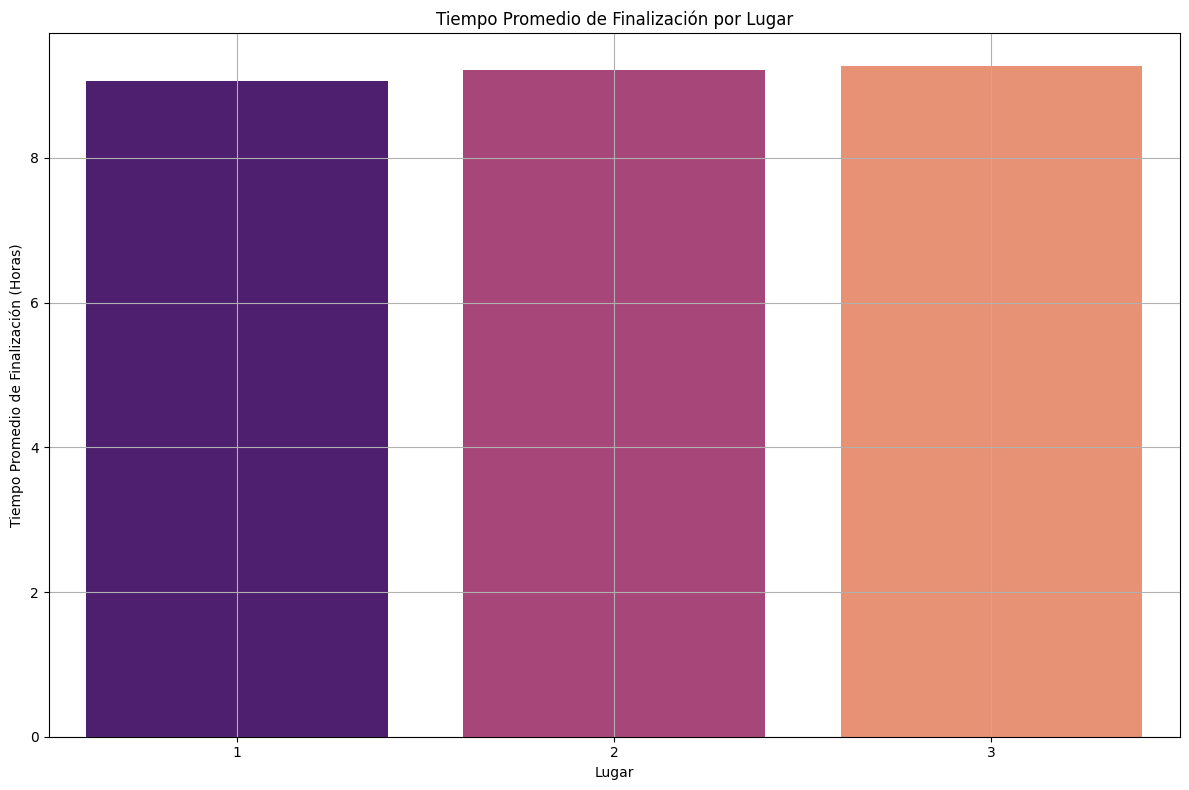

In [20]:
# KPI 3: Tiempo Promedio de Finalización por Lugar
place_avg_times = iron_man_data.groupby('Place')['Time_in_hours'].mean().reset_index()
place_avg_times = place_avg_times.sort_values(by='Time_in_hours')

plt.figure(figsize=(12, 8))
sns.barplot(x='Place', y='Time_in_hours', data=place_avg_times, palette='magma')
plt.xlabel('Lugar')
plt.ylabel('Tiempo Promedio de Finalización (Horas)')
plt.title('Tiempo Promedio de Finalización por Lugar')
plt.grid(True)
plt.tight_layout()
plt.show()


## Selección de variable objetivo

**Variable Objetivo:** Tiempo de Finalización en Horas (Time_in_hours)

El tiempo de finalización es una métrica central en las competiciones Ironman y refleja el rendimiento general del atleta. Es la variable más directamente relacionada con el éxito en la competencia, por lo que es una candidata ideal para el análisis predictivo.

Predecir el tiempo de finalización permite a los analistas y entrenadores entender y anticipar el rendimiento de los atletas en futuros eventos. Esta información puede ser utilizada para ajustar estrategias de entrenamiento, planificar la participación en eventos, y gestionar expectativas.

## Identificación de patrones en los datos usando kMeans

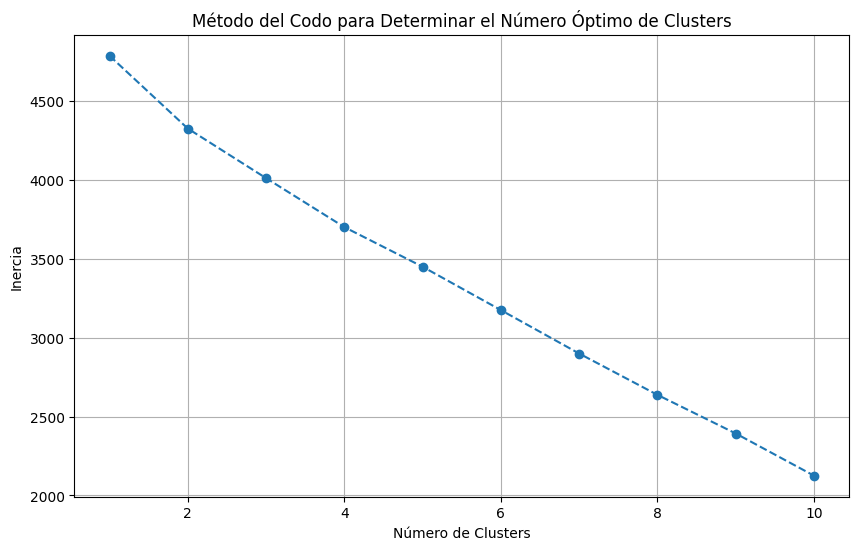

In [21]:
# Codificando Gender y Country mediante One-Hot
iron_man_data_encoded = pd.get_dummies(iron_man_data, columns=['Country', 'Gender'], drop_first=True)

# Características para clustering
X = iron_man_data_encoded[['Year', 'Place', 'Time_in_hours'] + [col for col in iron_man_data_encoded.columns if col.startswith('Country_') or col.startswith('Gender_')]]

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar el número óptimo de clusters utilizando el método del codo
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Visualizar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.grid(True)
plt.show()





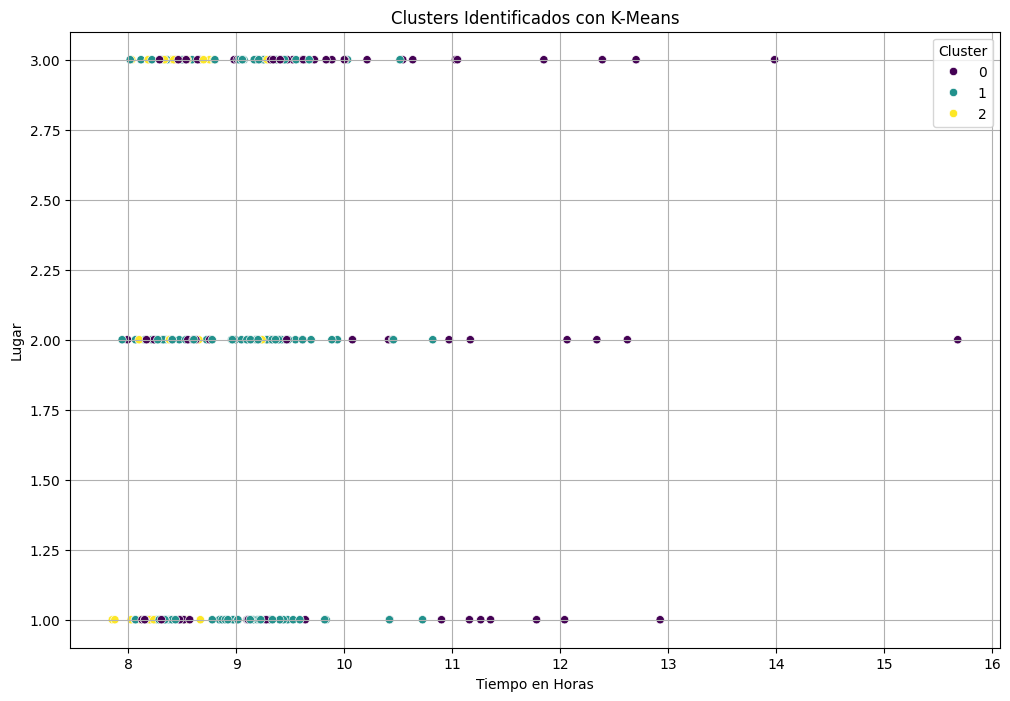

In [22]:
# Aplicando K-Means con el número óptimo de clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters = optimal_clusters, random_state = 1998)
iron_man_data_encoded['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar los clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=iron_man_data_encoded, x='Time_in_hours', y='Place', hue='Cluster', palette='viridis', marker='o')
plt.xlabel('Tiempo en Horas')
plt.ylabel('Lugar')
plt.title('Clusters Identificados con K-Means')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [23]:
# Resultados
cluster_summary = iron_man_data_encoded.groupby('Cluster').agg({
    'Time_in_hours': ['mean', 'std'],
    'Place': 'mean',
    'Year': 'mean'
}).reset_index()

print("Resumen de los clusters identificados:")
print(cluster_summary)

Resumen de los clusters identificados:
  Cluster Time_in_hours               Place         Year
                   mean       std      mean         mean
0       0      9.706760  1.455016  2.086957  1988.836957
1       1      9.002737  0.596010  1.861789  2003.170732
2       2      8.455038  0.408157  2.189189  2007.540541


* Cluster 0: Agrupa a los atletas con tiempos de finalización más largos y provenientes de años anteriores. Estos atletas tienden a terminar en posiciones más cercanas al segundo lugar.

* Cluster 1: Representa a los atletas con los tiempos de finalización más rápidos y menos variabilidad. Aunque son rápidos, terminan en posiciones promedio entre el segundo y tercer lugar, y provienen de años recientes.

* Cluster 2: Incluye a atletas con tiempos intermedios y variabilidad moderada. Tienden a finalizar en posiciones más cercanas al primer lugar y también provienen de años más recientes.


Hay una clara diferencia en los tiempos de finalización y las posiciones obtenidas por los atletas, dependiendo de la época en la que compitieron y su desempeño relativo. Los atletas más recientes parecen beneficiarse de mejoras en entrenamiento y tecnología, lo cual se refleja en sus tiempos más rápidos en comparación con los atletas de años anteriores.

## Aplicando ML

### Definiendo características

In [24]:
# Caracteriticas y variable objetivo
X = iron_man_data_encoded[['Year', 'Place'] + [col for col in iron_man_data_encoded.columns if col.startswith('Country_') or col.startswith('Gender_')]]
y = iron_man_data_encoded['Time_in_hours']

### Dividir data set

In [25]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1998)

### Normalización

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Aplicando modelo: Regresión lineal

In [27]:
# Crear modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_lin_reg = lin_reg.predict(X_test)

# Evaluar el modelo
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

print(f'Regresión Lineal - MSE: {mse_lin_reg}, R²: {r2_lin_reg}')

Regresión Lineal - MSE: 0.713802331245874, R²: 0.4909784620410105


### Aplicando modelo: Red Neuronal

In [28]:
# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

# Predecir en el conjunto de prueba
y_pred_nn = model.predict(X_test_scaled)

# Evaluar el modelo
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Red Neuronal - MSE: {mse_nn}, R²: {r2_nn}')


Epoch 1/100
16/16 [==============================] - 3s 54ms/step - loss: 73.3899 - val_loss: 66.3735
Epoch 2/100
16/16 [==============================] - 0s 25ms/step - loss: 54.6115 - val_loss: 48.7927
Epoch 3/100
16/16 [==============================] - 0s 20ms/step - loss: 37.1173 - val_loss: 30.8789
Epoch 4/100
16/16 [==============================] - 0s 23ms/step - loss: 22.2480 - val_loss: 16.2543
Epoch 5/100
16/16 [==============================] - 0s 20ms/step - loss: 12.6056 - val_loss: 7.5097
Epoch 6/100
16/16 [==============================] - 0s 26ms/step - loss: 7.7431 - val_loss: 3.4805
Epoch 7/100
16/16 [==============================] - 0s 21ms/step - loss: 5.0062 - val_loss: 2.4950
Epoch 8/100
16/16 [==============================] - 0s 21ms/step - loss: 3.5110 - val_loss: 2.0644
Epoch 9/100
16/16 [==============================] - 0s 15ms/step - loss: 2.5234 - val_loss: 1.7175
Epoch 10/100
16/16 [==============================] - 0s 17ms/step - loss: 1.9604 - val_los

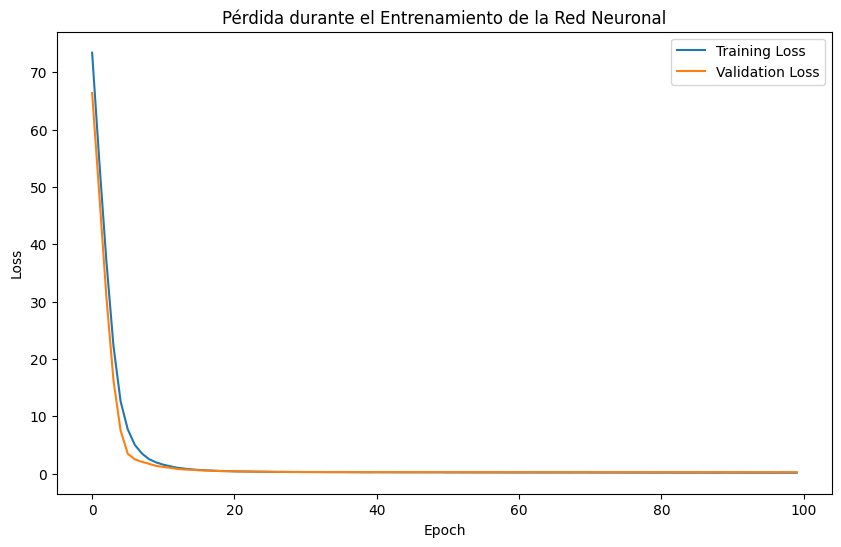

In [29]:
# Visualizar la pérdida durante el entrenamiento de la red neuronal
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida durante el Entrenamiento de la Red Neuronal')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Resultados

In [30]:
print(f'Regresión Lineal - MSE: {mse_lin_reg}, R²: {r2_lin_reg}')

print(f'Red Neuronal - MSE: {mse_nn}, R²: {r2_nn}')

Regresión Lineal - MSE: 0.713802331245874, R²: 0.4909784620410105
Red Neuronal - MSE: 0.5008363167505767, R²: 0.6428472406735815


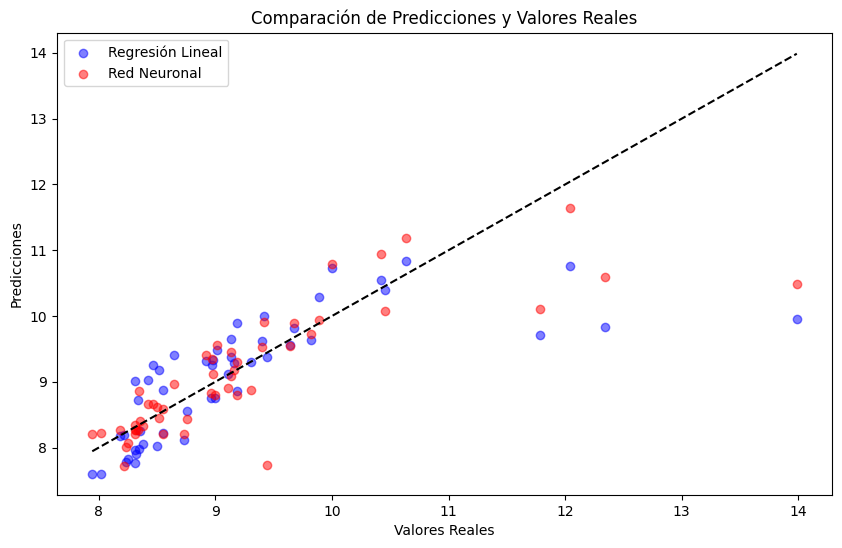

In [31]:
# Comparar predicciones y valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lin_reg, color='blue', alpha=0.5, label='Regresión Lineal')
plt.scatter(y_test, y_pred_nn, color='red', alpha=0.5, label='Red Neuronal')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.title('Comparación de Predicciones y Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()


## Conclusiones

**Interpretación de Resultados**

* Regresión Lineal:

  MSE (Mean Squared Error): 0.713802331245874

  El MSE de 0.71 indica que, en promedio, las predicciones del modelo de regresión lineal tienen un error cuadrático medio de aproximadamente 0.71 horas (es decir, unos 43 minutos).
  Un valor más bajo del MSE es mejor, ya que indica que las predicciones están más cerca de los valores reales.
  
  R² (Coeficiente de Determinación): 0.4909784620410105

  El R² de aproximadamente 0.49 significa que el modelo de regresión lineal explica aproximadamente el 49% de la variabilidad en los tiempos de finalización.


* Red Neuronal:

  MSE (Mean Squared Error): 0.44591028741148175

  El MSE de 0.45 indica que, en promedio, las predicciones del modelo de red neuronal tienen un error cuadrático medio de aproximadamente 0.45 horas (es decir, unos 27 minutos).

  Este valor es significativamente menor que el MSE del modelo de regresión lineal, lo que sugiere que el modelo de red neuronal tiene mejores predicciones.

  R² (Coeficiente de Determinación): 0.6820156920841669

  El R² de aproximadamente 0.68 significa que el modelo de red neuronal explica aproximadamente el 68% de la variabilidad en los tiempos de finalización.

  Este valor es considerablemente mayor que el R² del modelo de regresión lineal, indicando que la red neuronal explica mejor la variabilidad de los datos.


### Elección del mejor modelo

La red neuronal tiene un MSE menor (0.45) comparado con la regresión lineal (0.71), lo que sugiere que la red neuronal tiene mejores predicciones en términos de error medio.

La red neuronal tiene un R² mayor (0.68) comparado con la regresión lineal (0.49), indicando que la red neuronal explica mejor la variabilidad en los tiempos de finalización.

Basado en el análisis de las métricas de rendimiento, se puede concluir que la red neuronal sencilla es el mejor modelo para predecir los tiempos de finalización en el dataset de Ironman. La red neuronal proporciona predicciones más precisas y un mejor ajuste a los datos.